<a href="https://colab.research.google.com/gist/qbeer/07eb98879a555a676b6da86ea8cd7f9e/hw_6_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Implement a linear model
return the weight parameters w = (w1, w2, ... , wP) and the intercept parameter w0 separately where:

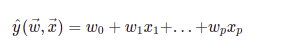

* check your returned coefficients with the built in `LinearRegression` class from the sklearn library, they should be within tolerance 1e-6 to each other

* use a generated regression dataset from `sklearn.dataset import make_regression` API with parameters `n_samples=1000` and `n_features=20`

## 2. Use of real data

* download the [Communities and Crime Data Set](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime) from UCI, the task includes understanding the dataset: naming the appropiate data fields, handling missing values, etc.

* split the data in training/test sets and fit a LinearRegression model with 5-fold cross-validation on top of it - compare training and testing scores (R^2 by default) for the different CV splits, print the mean score and its standard deviation

* fit the best Lasso regression model with 5-fold grid search cross validation (GridSearchCV) on the parameters: alpha, normalize, max_iter and show the best parameters

## 3. Shrinkage

* interpret Lasso models based on its descriptive parameters by the shrinkage method described during the lecture (make a plot and check the names of the features that are not eliminated by the penalty parameter) on the data we have here [ this is an explanatory data analysis problem, try to be creative ]

* fit Ridge models and apply the shrinkage method as well, did you get what you expect?

* do you think normalization is needed here? if so, do not forget to use it in the next tasks

## 4. Subset selection

* Split the data to training and test sets and do recursice feature elimination until 10 remaining predictors with 5-fold cross-validated regressors (RidgeCV, LassoCV, ElasticNetCV) on the training set, plot their names and look up some of their meanings [ recursive feature elimination is part of sklearn but you can do it with a for loop if you whish ]

* Do all models provide the same descriptors? Check their performance on the test set! Plot all model predictions compared to the y_test on 3 different plots, which model seems to be the best?

# 5. ElasticNet penalty surface
* visualize the surface of the `objective(alpha, beta)`

 * parameters corresponding to the L1 and L2 regularizations. Select the best possible combination of the hyper-parameters that minimize the objective (clue: from scipy.optimize import minimize)

* this task is similar to what you've seen during class, just not for MSE vs. single penalty parameter but MSE vs. two penalty parameters `alpha, beta`

* interpret the overall results, do you think regularization is necessary at all? do you think linear models are powerful enough on this dataset?

----------------------------
------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import *
from sklearn.datasets import *
from sklearn.model_selection import *
from sklearn.feature_selection import *
from scipy.optimize import *
import matplotlib as mpl
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")
import requests
import io
import re

---------------------
## 1. Implement a linear model
return the weight parameters w = (w1, w2, ... , wP) and the intercept parameter w0 separately where:

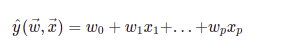

* check your returned coefficients with the built in `LinearRegression` class from the sklearn library, they should be within tolerance 1e-6 to each other

* use a generated regression dataset from `sklearn.dataset import make_regression` API with parameters `n_samples=1000` and `n_features=20`

-----------------

In [2]:
def linear_model(X, y):
    """
    """
    _X    = np.concatenate((X, np.ones(shape=(X.shape[0], 1))),axis=1)
    S     = _X.T@_X
    S_inv = np.linalg.inv(S)
    
    unnormalized_weights = S_inv@ _X.T
    weights              = np.dot(unnormalized_weights,y)
    return weights[:-1], weights[-1]

In [3]:
X,y=make_regression(n_samples=1000,n_features=20)
w,w0=linear_model(X,y)
regr=LinearRegression().fit(X,y)

In [4]:
assert np.allclose(regr.coef_,w,rtol=1e-8), 'The coefficients do not match'
assert np.allclose(regr.intercept_,w0,rtol=1e-8), 'The intercept parameter does not mach'

-------------
## 2. Use of real data

* download the [Communities and Crime Data Set](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime) from UCI, the task includes understanding the dataset: naming the appropiate data fields, handling missing values, etc.

* split the data in training/test sets and fit a LinearRegression model with 5-fold cross-validation on top of it - compare training and testing scores (R^2 by default) for the different CV splits, print the mean score and its standard deviation

* fit the best Lasso regression model with 5-fold grid search cross validation (GridSearchCV) on the parameters: alpha, normalize, max_iter and show the best parameters
-------------

In [6]:
df=pd.read_csv(io.StringIO(requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data").content.decode('utf-8')), na_values='?')
cols = [s.split(' ')[1] 
        for s in re.findall(r'@attribute.*',requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names").content.decode('utf-8'))]

df.columns = cols

In [ ]:
df

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(20,5))
ax.imshow(df.isna().T)
plt.show()

In [ ]:
print(df.shape)
mask=df.isna().values.sum(0)>=df.shape[0]/2
df=df.drop(columns=df.columns[mask])
print(df.shape)

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(20,5))
ax.imshow(df.isna().T)
plt.show()

In [ ]:
df[df.isna().any(axis=1)]


In [ ]:
for i in range(df.shape[1]):
    print(df.columns.values[i],'---',df.dtypes.values[i])

In [ ]:
communityname=df.pop('communityname')
fold=df.pop('fold')

In [ ]:
if not df.isna().values.all(): print('Number of missing values: '+ str(np.sum(df.isna().values)))
df.fillna(df.mean(), inplace=True)

In [ ]:
df.head()

In [ ]:
X = df.values[:, :-1]
y = df.values[:, -1]

linreg  = LinearRegression()
results = cross_validate(linreg,X,y,cv=5,return_train_score=True)

In [ ]:
for i in results.keys():
    print(i,': \n')
    for j in range(5): print('  ',j+1,'-', results[i][j])
    print('\n')

In [ ]:
test  = np.asarray([np.mean(results['test_score']),np.std(results['test_score'])])
train = np.asarray([np.mean(results['train_score']),np.std(results['train_score'])])

print('training -- mean score and std: %.3f +/- %.3f' % (train[0],train[1]))
print('test -- mean score and std: %.3f +/- %.3f' % (test[0],test[1]))

In [ ]:
lasso = Lasso()

dist = dict(alpha=np.linspace(1e-6, .05, 50),
            normalize=[True, False], 
            max_iter=[10000, 50000])

clf = GridSearchCV(lasso, dist, cv=5, verbose=1,
                   return_train_score=True, n_jobs=8)

In [ ]:
search = clf.fit(X, y)

In [ ]:
search.best_params_

-------------
## 3. Shrinkage

* interpret Lasso models based on its descriptive parameters by the shrinkage method described during the lecture (make a plot and check the names of the features that are not eliminated by the penalty parameter) on the data we have here [ this is an explanatory data analysis problem, try to be creative ]

* fit Ridge models and apply the shrinkage method as well, did you get what you expect?

* do you think normalization is needed here? if so, do not forget to use it in the next tasks
------------

In [ ]:
c      = []
alphas = np.linspace(1e-6,0.05,200)

for alpha in alphas:
    lasso = Lasso(alpha=alpha,max_iter=10000,normalize=True)
    lasso.fit(X, y)
    c.append(lasso.coef_)
c=np.asarray(c)

In [ ]:
x=2
colorm=cm.gist_rainbow
fig,ax=plt.subplots(1,1,figsize=(16,9))
norm = mpl.colors.Normalize(vmin=0, vmax=c.shape[1])

for i in range(c.shape[1]):
    ax.plot(alphas,c[:,i], color=colorm(norm(i)))


mask = np.where(c[x]!=0)[0]
labels=df.columns.values[mask]

ax.vlines(alphas[x], ymin=-0.6, ymax=0.6, 
          label='alpha = %.5f' % alphas[x], color='k',ls='--')
ax.text(alphas[x], -0.61, '$\\alpha=$'+str(np.round(alphas[x],5)), fontsize=15)
hand=[]
for i,s in enumerate(labels):
    hand.append(mpatches.Patch(color=colorm(norm(mask[i])), label=s+': %.3f'%c[x][mask[i]]))



ax.set_xscale('log')   
ax.set_xlabel('Penalty parameter',fontsize=30)
ax.set_ylabel('Coefficient',fontsize=30)
ax.tick_params(labelsize=25)
ax.legend(handles=hand, fontsize=15)
plt.show()

In [ ]:
c      = []
alphas = np.linspace(1e-6, 1000, 200)

for alpha in alphas:
    lasso = Ridge(alpha=alpha,
                  max_iter=10_000,
                  normalize=True)
    lasso.fit(X, y)
    c.append(lasso.coef_)

c=np.asarray(c)

In [ ]:
x=10
colorm=cm.gist_rainbow
fig,ax=plt.subplots(1,1,figsize=(16,9))
norm = mpl.colors.Normalize(vmin=0, vmax=c.shape[1])

for i in range(c.shape[1]):
    ax.plot(alphas,c[:,i], color=colorm(norm(i)))


mask = np.where(c[x]!=0)[0]
labels=df.columns.values[mask]

ax.vlines(alphas[x], ymin=-0.6, ymax=0.6, 
          label='alpha = %.5f' % alphas[x], color='k',ls='--')
ax.text(alphas[x], -0.61, '$\\alpha=$'+str(np.round(alphas[x],5)), fontsize=15)
hand=[]
for i,s in enumerate(labels):
    hand.append(mpatches.Patch(color=colorm(norm(mask[i])), label=s+': %.3f'%c[x][mask[i]]))



ax.set_xscale('log')   
ax.set_xlabel('Penalty parameter',fontsize=30)
ax.set_ylabel('Coefficient',fontsize=30)
ax.tick_params(labelsize=25)
#ax.legend(handles=hand, fontsize=15)
plt.show()

---------------
## 4. Subset selection

* Split the data to training and test sets and do recursice feature elimination until 10 remaining predictors with 5-fold cross-validated regressors (RidgeCV, LassoCV, ElasticNetCV) on the training set, plot their names and look up some of their meanings [ recursive feature elimination is part of sklearn but you can do it with a for loop if you whish ]

* Do all models provide the same descriptors? Check their performance on the test set! Plot all model predictions compared to the y_test on 3 different plots, which model seems to be the best?

---------------

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
result_data=[]

In [ ]:
#RidgeCV
rfe = RFE(estimator=RidgeCV(cv=5, normalize=True), n_features_to_select=10)
rfe = rfe.fit(X, y)
features=pd.DataFrame(df.columns.values[:-1])

var    = sorted(features[rfe.support_].values.tolist())
var    = list(np.asarray(var).T[0])
ridge_score  = rfe.score(X_test, y_test)
ridge_pred = rfe.predict(X_test)

result_data.append(var+[ridge_score])

In [ ]:
#LassoCV
rfe = RFE(estimator=LassoCV(cv=5, normalize=True), n_features_to_select=10)
rfe = rfe.fit(X, y)
features=pd.DataFrame(df.columns.values[:-1])

var    = sorted(features[rfe.support_].values.tolist())
var    = list(np.asarray(var).T[0])
lasso_score  = rfe.score(X_test, y_test)

lasso_pred = rfe.predict(X_test)

result_data.append(var+[lasso_score])

In [ ]:
#ElasticNetCV
rfe = RFE(estimator=ElasticNetCV(cv=5, normalize=True), n_features_to_select=10)
rfe = rfe.fit(X, y)
features=pd.DataFrame(df.columns.values[:-1])

var    = sorted(features[rfe.support_].values.tolist())
var    = list(np.asarray(var).T[0])
elastic_score  = rfe.score(X_test, y_test)
elastic_pred = rfe.predict(X_test)

result_data.append(var+[elastic_score])

In [ ]:
result=pd.DataFrame(columns=['var_'+str(i) for i in range(1,11)]+['score'],
                    index=['RidgeCV', 'LassoCV', 'ElasticNetCV'],
                    data=result_data)

display(result)

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(18, 6))


axes[0].plot(y_test, lasso_pred, ls='', marker='o',alpha=0.6, label='LassoCV--score = %.3f'%lasso_score)
axes[1].plot(y_test, ridge_pred,  ls='', marker='o',alpha=0.6,label='RidgeCV--score = %.3f'%ridge_score )
axes[2].plot(y_test, elastic_pred,  ls='', marker='o',alpha=0.6,label='ElasticNetCV--score = %.3f'% elastic_score)

axes[0].set_ylabel('y$_{pred}$', fontsize=25)
axes[1].set_xlabel('y$_{test}$', fontsize=25)

for ax in axes:
    ax.legend()
    ax.set_xticks([0., .5, 1.])
    ax.set_yticks([0., .5, 1.])
    ax.plot(np.linspace(0, 1, 200), np.linspace(0, 1, 200), 'r-')
    
    

plt.xlim(0, 1)
plt.ylim(0, 1)


plt.show()

--------------------------
# 5. ElasticNet penalty surface
* visualize the surface of the `objective(alpha, beta)`

 * parameters corresponding to the L1 and L2 regularizations. Select the best possible combination of the hyper-parameters that minimize the objective (clue: from scipy.optimize import minimize)

* this task is similar to what you've seen during class, just not for MSE vs. single penalty parameter but MSE vs. two penalty parameters `alpha, beta`

* interpret the overall results, do you think regularization is necessary at all? do you think linear models are powerful enough on this dataset?
---------------------

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
alpha  = np.linspace(1e-6, 0.5, 100)
beta   = np.linspace(0.1, 1, 100)
scores = np.empty((100,100))

for i,a in enumerate(alpha):
    for j,b in enumerate(beta):
        elastic = ElasticNet(alpha=a, l1_ratio=b, max_iter=15000, 
                             normalize=True).fit(X_train, y_train)
        y_pred = elastic.predict(X_test)
        mse=np.mean(np.square(y_pred - y_test))
        scores[i][j]=mse

In [ ]:
def SCORE(param,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    ''''''
    a,b=param
    elastic = ElasticNet(alpha=a, l1_ratio=b, max_iter=15000, 
                             normalize=True).fit(X_train, y_train)
    y_pred = elastic.predict(X_test)
    mse=np.mean(np.square(y_pred - y_test))
    return mse

In [ ]:
MIN = minimize(SCORE, x0=[1e-4, 1e-6], bounds=[(1e-10, 1), (1e-10, 1)]).x

In [ ]:
MIN

In [ ]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
alpha_grid, beta_grid = np.meshgrid(alpha, beta*alpha)

ax.plot_surface(alpha_grid, beta_grid, scores, rstride=1, cstride=1,
                       cmap=cm.cividis, linewidth=0, alpha=0.8, antialiased=False)


ax.set_xlabel('L2', fontsize=25)
ax.set_ylabel('L1', fontsize=25)
ax.set_zlabel('MSE', fontsize=25)

ax.plot(np.repeat(MIN[0], 100), np.repeat(MIN[1], 100), np.linspace(0, 0.05, 100), color='tab:red')
ax.view_init(elev=20, azim=30)
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
alpha_grid, beta_grid = np.meshgrid(alpha, beta*alpha)

ax.plot_surface(alpha_grid, beta_grid, scores, rstride=1, cstride=1,
                       cmap=cm.cividis, linewidth=0, alpha=0.8, antialiased=False)


ax.set_xlabel('L2', fontsize=25)
ax.set_ylabel('L1', fontsize=25)
ax.set_zlabel('MSE', fontsize=25)

ax.plot(np.repeat(min_penalty[0], 100), np.repeat(min_penalty[1], 100), np.linspace(0, 0.05, 100), color='tab:red')
ax.view_init(elev=0, azim=-90)
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
alpha_grid, beta_grid = np.meshgrid(alpha, beta*alpha)

ax.plot_surface(alpha_grid, beta_grid, scores, rstride=1, cstride=1,
                       cmap=cm.cividis, linewidth=0, alpha=0.8, antialiased=False)


ax.set_xlabel('L2', fontsize=25)
ax.set_ylabel('L1', fontsize=25)
ax.set_zlabel('MSE', fontsize=25)

ax.plot(np.repeat(MIN[0], 100), np.repeat(MIN[1], 100), np.linspace(0, 0.05, 100), color='tab:red')
ax.view_init(elev=20, azim=-120)
plt.show()

In [ ]:
fig,ax=plt.subplots(1,1, figsize=(6,6))
m=ax.imshow(scores, cmap=cm.viridis)
fig.colorbar(m)
ax.set_xlabel('$L_2$', fontsize=25)
ax.set_ylabel('$L_1$', fontsize=25)
plt.show()